<a href="https://colab.research.google.com/github/suhanask/Assignments_ExcelR_Suhana/blob/main/MLR_Startups50_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('50_Startups.csv')

In [ ]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [ ]:
df1 = pd.get_dummies(df,['State'])
df1

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,False
2,153441.51,101145.55,407934.54,191050.39,False,True,False
3,144372.41,118671.85,383199.62,182901.99,False,False,True
4,142107.34,91391.77,366168.42,166187.94,False,True,False
5,131876.90,99814.71,362861.36,156991.12,False,False,True
6,134615.46,147198.87,127716.82,156122.51,True,False,False
7,130298.13,145530.06,323876.68,155752.60,False,True,False
8,120542.52,148718.95,311613.29,152211.77,False,False,True
9,123334.88,108679.17,304981.62,149759.96,True,False,False


In [ ]:
df1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [ ]:
df1 = df1.drop('State_New York', axis=1)
df1

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,False,False
1,162597.70,151377.59,443898.53,191792.06,True,False
2,153441.51,101145.55,407934.54,191050.39,False,True
3,144372.41,118671.85,383199.62,182901.99,False,False
4,142107.34,91391.77,366168.42,166187.94,False,True
5,131876.90,99814.71,362861.36,156991.12,False,False
6,134615.46,147198.87,127716.82,156122.51,True,False
7,130298.13,145530.06,323876.68,155752.60,False,True
8,120542.52,148718.95,311613.29,152211.77,False,False
9,123334.88,108679.17,304981.62,149759.96,True,False


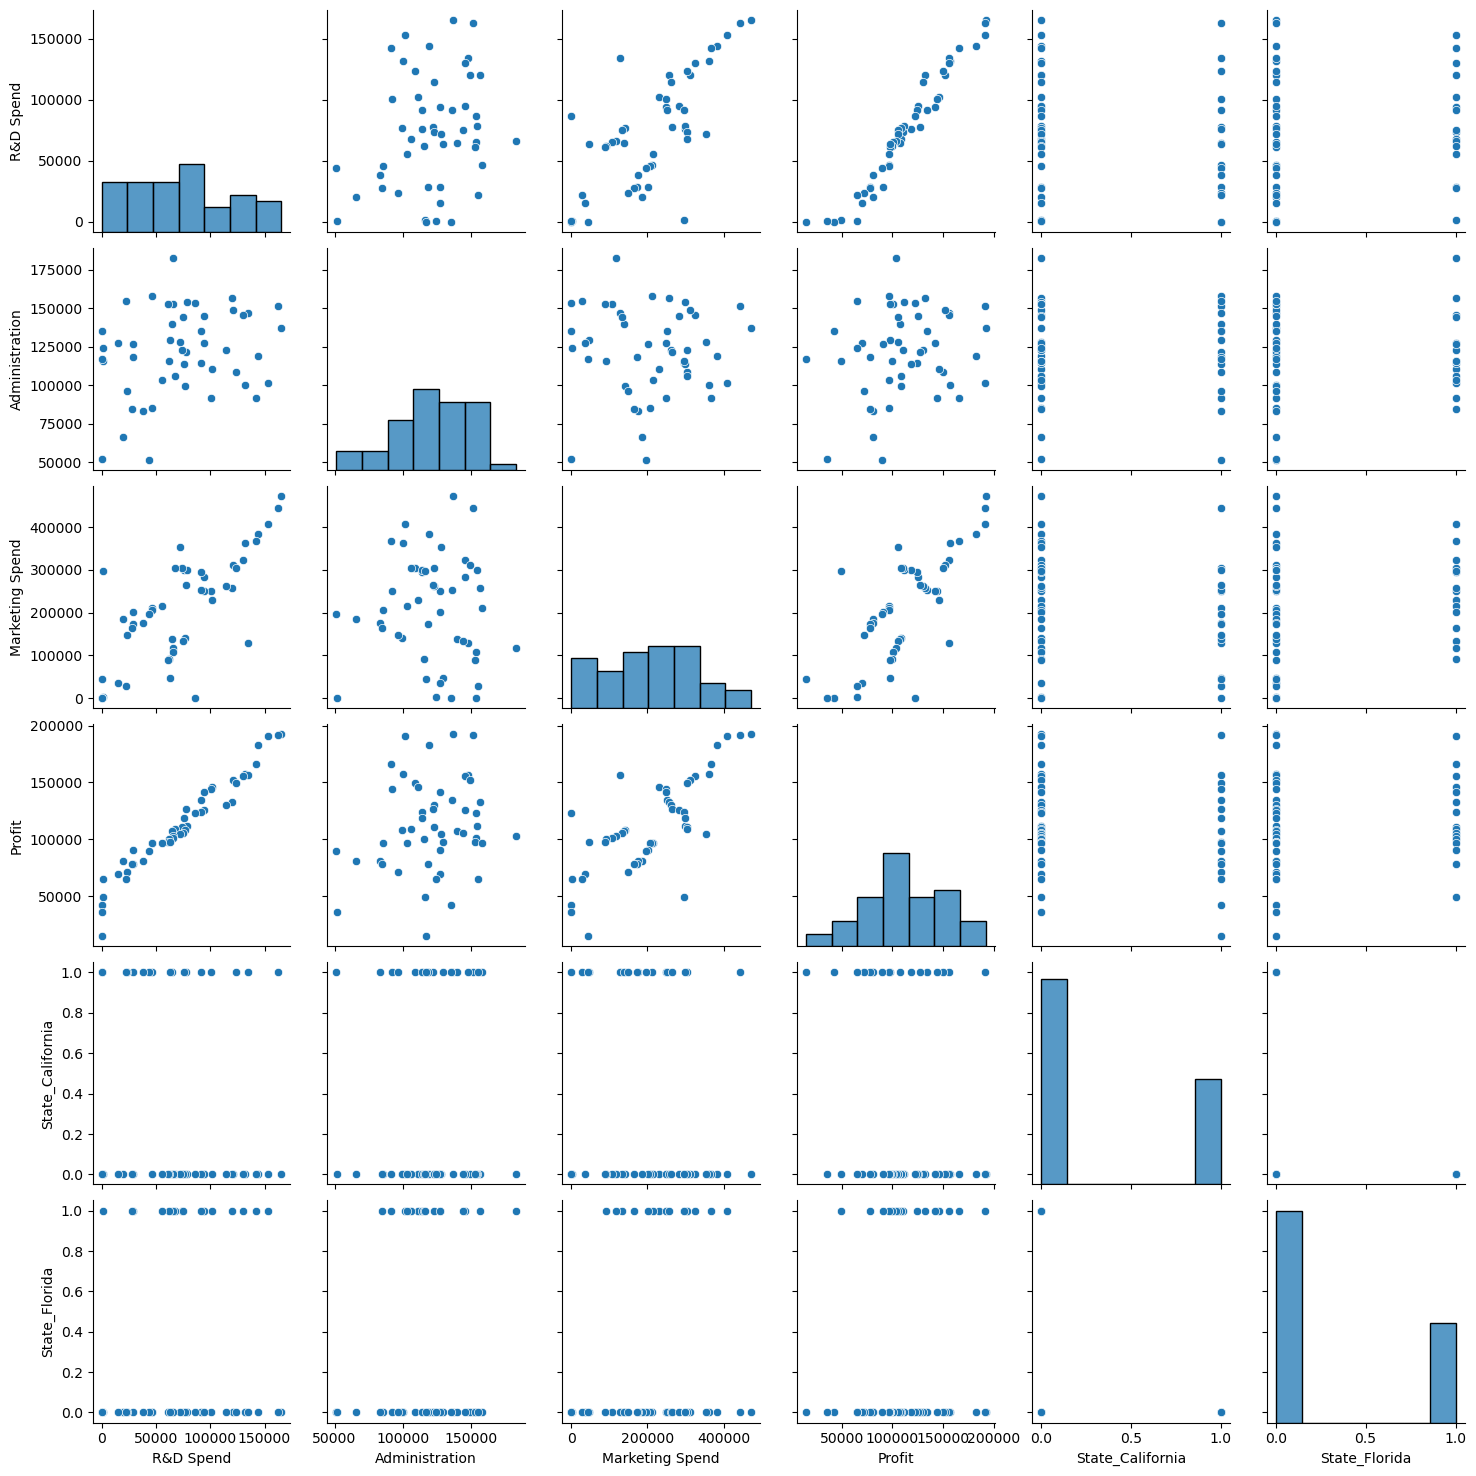

In [ ]:
sns.pairplot(df1)

In [ ]:
df1.rename(columns={'R&D Spend':'RD', 'Administration':'Admin', 'Marketing Spend':'MS', 'State_California':'Cali', 'State_Florida': 'Flori'},
           inplace=True)
df1

,RD,Admin,MS,Profit,Cali,Flori
0,165349.20,136897.80,471784.10,192261.83,False,False
1,162597.70,151377.59,443898.53,191792.06,True,False
2,153441.51,101145.55,407934.54,191050.39,False,True
3,144372.41,118671.85,383199.62,182901.99,False,False
4,142107.34,91391.77,366168.42,166187.94,False,True
5,131876.90,99814.71,362861.36,156991.12,False,False
6,134615.46,147198.87,127716.82,156122.51,True,False
7,130298.13,145530.06,323876.68,155752.60,False,True
8,120542.52,148718.95,311613.29,152211.77,False,False
9,123334.88,108679.17,304981.62,149759.96,True,False


Text(0.5, 1.0, 'Profit')

<Figure size 2000x1200 with 0 Axes>

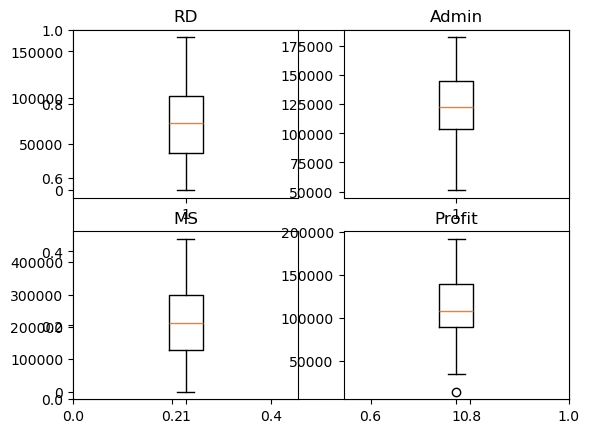

In [ ]:
plt.figure(figsize=(20,12))
plt.subplots()
plt.subplot(221)
plt.boxplot(df1['RD'])
plt.title('RD')
plt.subplot(222)
plt.boxplot(df1['Admin'])
plt.title('Admin')
plt.subplot(223)
plt.boxplot(df1['MS'])
plt.title('MS')
plt.subplot(224)
plt.boxplot(df1['Profit'])
plt.title('Profit')


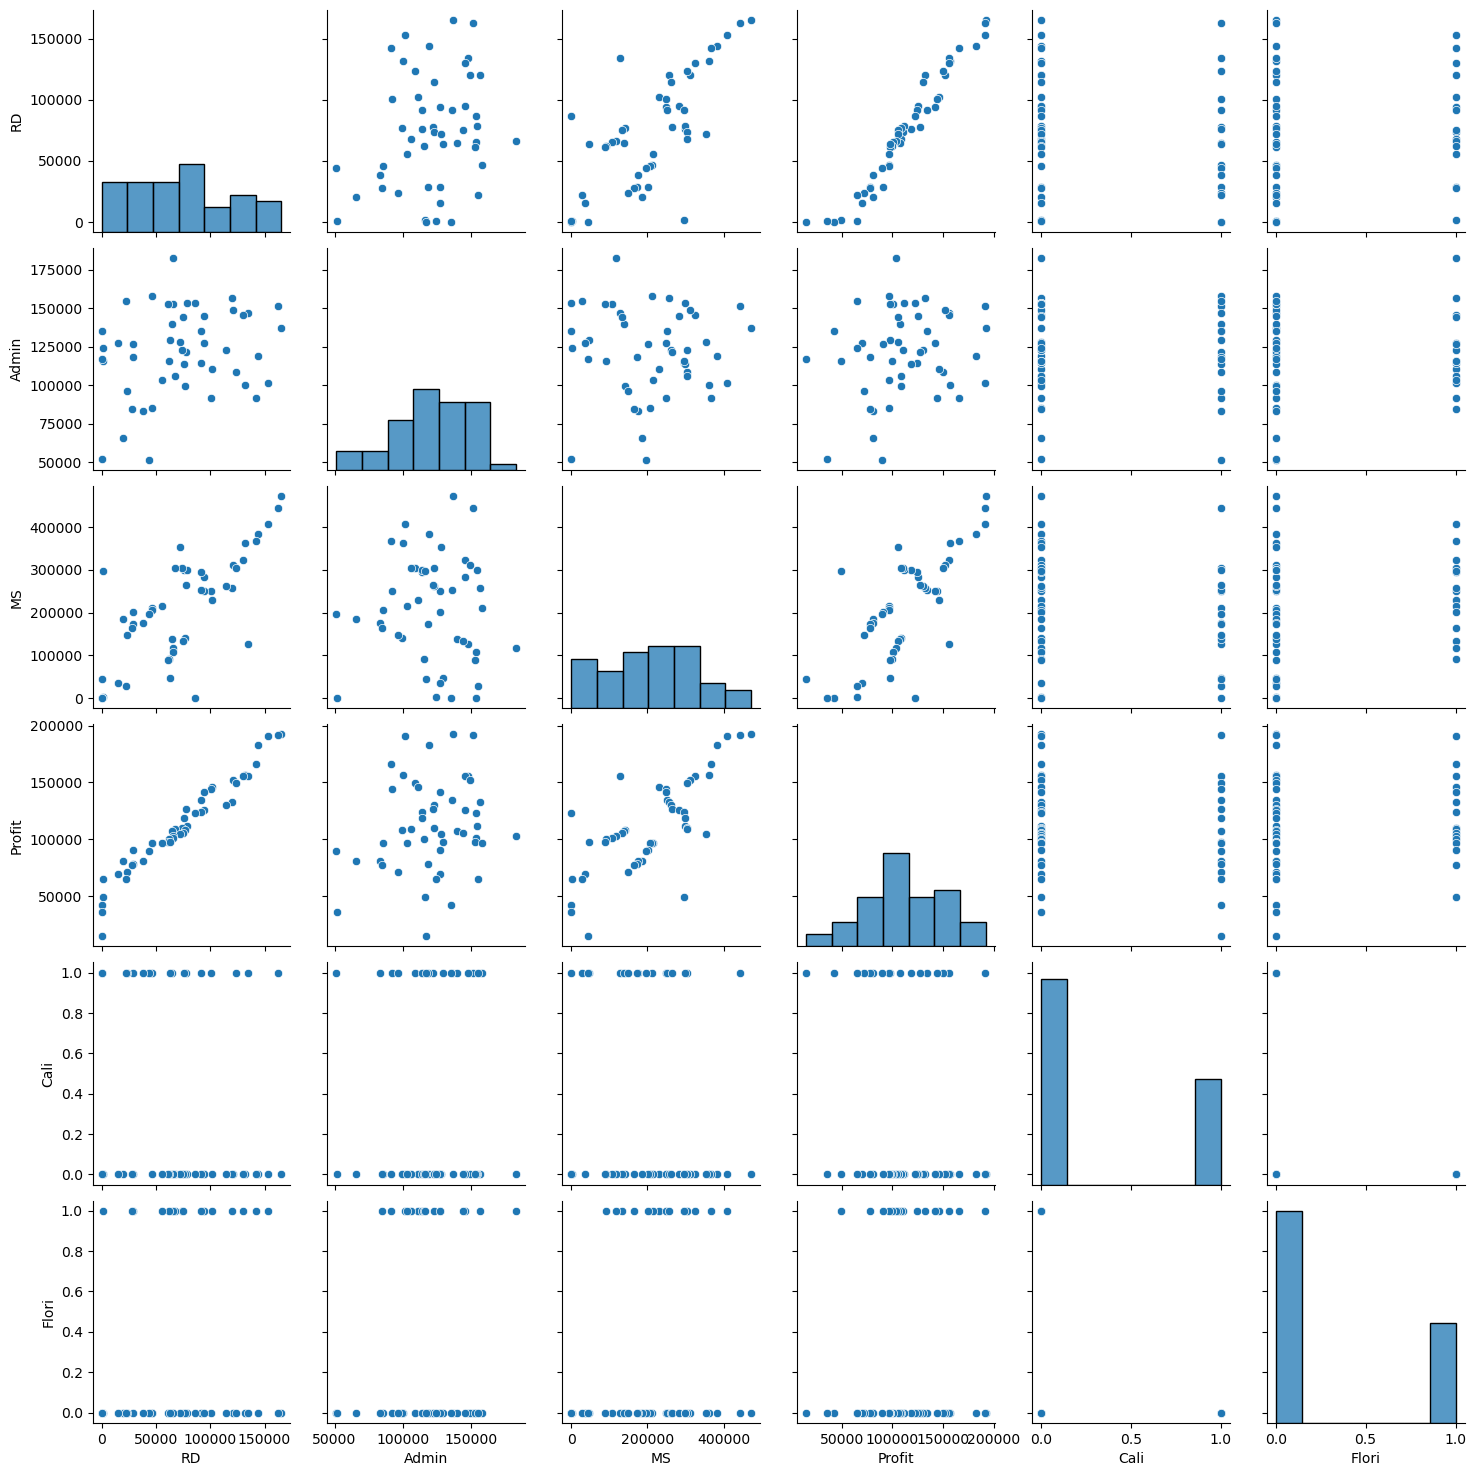

In [ ]:
sns.pairplot(df1)

In [ ]:
corr = df1.corr()
corr

,RD,Admin,MS,Profit,Cali,Flori
RD,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
Cali,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
Flori,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


<Axes: >

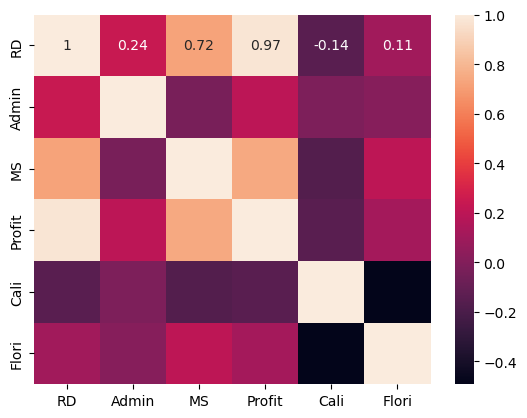

In [ ]:
sns.heatmap(corr, annot=True)

In [ ]:
model = smf.ols('Profit ~ RD+Admin+MS+Cali+Flori', data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.34e-27
Time:                        13:03:57   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.008e+04   6952.587      7.204      0.000    3.61e+04    6.41e+04
Cali[T.True]     41.8870   3256.039      0.013      0.990   -6520.229    6604.003
Flori[T.True]   240.6758   3338.857      0.072      0.943   -6488.349    6969.701
RD                0.8060      0.046     17.369      0.000       0.712       0.900
Admin            -0.0270      0.052     -0.517      0.608      -0.132       0.078
MS                0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.47e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelRD = smf.ols('Profit ~ RD', data=df1).fit()
modelRD.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.50e-32
Time:                        13:03:57   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelAdmin = smf.ols('Profit ~ Admin', data = df1).fit()
modelAdmin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.162
Time:                        13:03:57   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Admin          0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelMS = smf.ols('Profit ~ MS', data = df1).fit()
modelMS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.38e-10
Time:                        13:03:57   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
modelCali = smf.ols('Profit ~ Cali', data = df1).fit()
modelCali.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.312
Time:                        13:03:57   Log-Likelihood:                -600.12
No. Observations:                  50   AIC:                             1204.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.162e+05   7013.324     16.567      0.000    1.02e+05     1.3e+05
Cali[T.True] -1.228e+04    1.2e+04     -1.021      0.312   -3.65e+04    1.19e+04
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         2.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
modelFlori = smf.ols('Profit ~ Flori', data = df1).fit()
modelFlori.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.421
Time:                        13:03:57   Log-Likelihood:                -600.31
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1208.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.088e+05   6936.739     15.689      0.000    9.49e+04    1.23e+05
Flori[T.True]  9943.2135   1.23e+04      0.811      0.421   -1.47e+04    3.46e+04
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df1.columns

Index(['RD', 'Admin', 'MS', 'Profit', 'Cali', 'Flori'], dtype='object')

In [ ]:
rsq_RD = smf.ols('RD ~ Admin+MS+Cali+Flori', data=df1).fit().rsquared
vif_RD = 1/(1-rsq_RD)
rsq_Admin = smf.ols('Admin ~ RD+MS+Cali+Flori', data=df1).fit().rsquared
vif_Admin = 1/(1-rsq_Admin)
rsq_MS = smf.ols('MS ~ RD+Admin+Cali+Flori', data=df1).fit().rsquared
vif_MS = 1/(1-rsq_MS)


d1= {'Variables': ['RD', 'Admin', 'MS'],
     'VIF': [vif_RD, vif_Admin, vif_MS],
    'rsquared': [modelRD.rsquared, modelAdmin.rsquared, modelMS.rsquared],
    'adj_rsquared': [modelRD.rsquared_adj, modelAdmin.rsquared_adj, modelMS.rsquared_adj]}

vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF,rsquared,adj_rsquared
0,RD,2.495511,0.946535,0.945421
1,Admin,1.177766,0.040287,0.020293
2,MS,2.416797,0.559154,0.549969


In [ ]:
model1 = smf.ols('Profit ~ RD+MS', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.16e-31
Time:                        13:03:57   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD             0.7966      0.041     19.266      0.000       0.713       0.880
MS             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
df1.columns

Index(['RD', 'Admin', 'MS', 'Profit', 'Cali', 'Flori'], dtype='object')

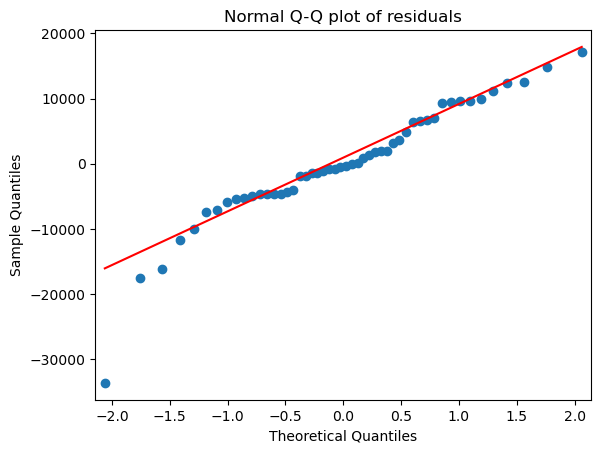

In [ ]:
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [ ]:
list(np.where(model1.resid>10000))

[array([10, 12, 36, 38, 45])]

In [ ]:
def get_standardized_values( vals ):
    return ( vals - vals.mean())/vals.std()

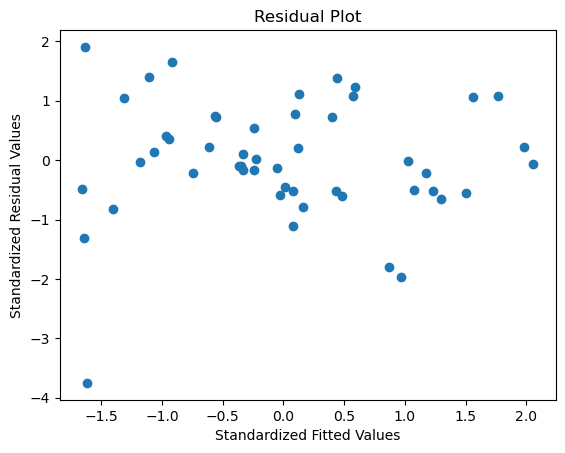

In [ ]:
plt.scatter(get_standardized_values(model1.fittedvalues),
            get_standardized_values(model1.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

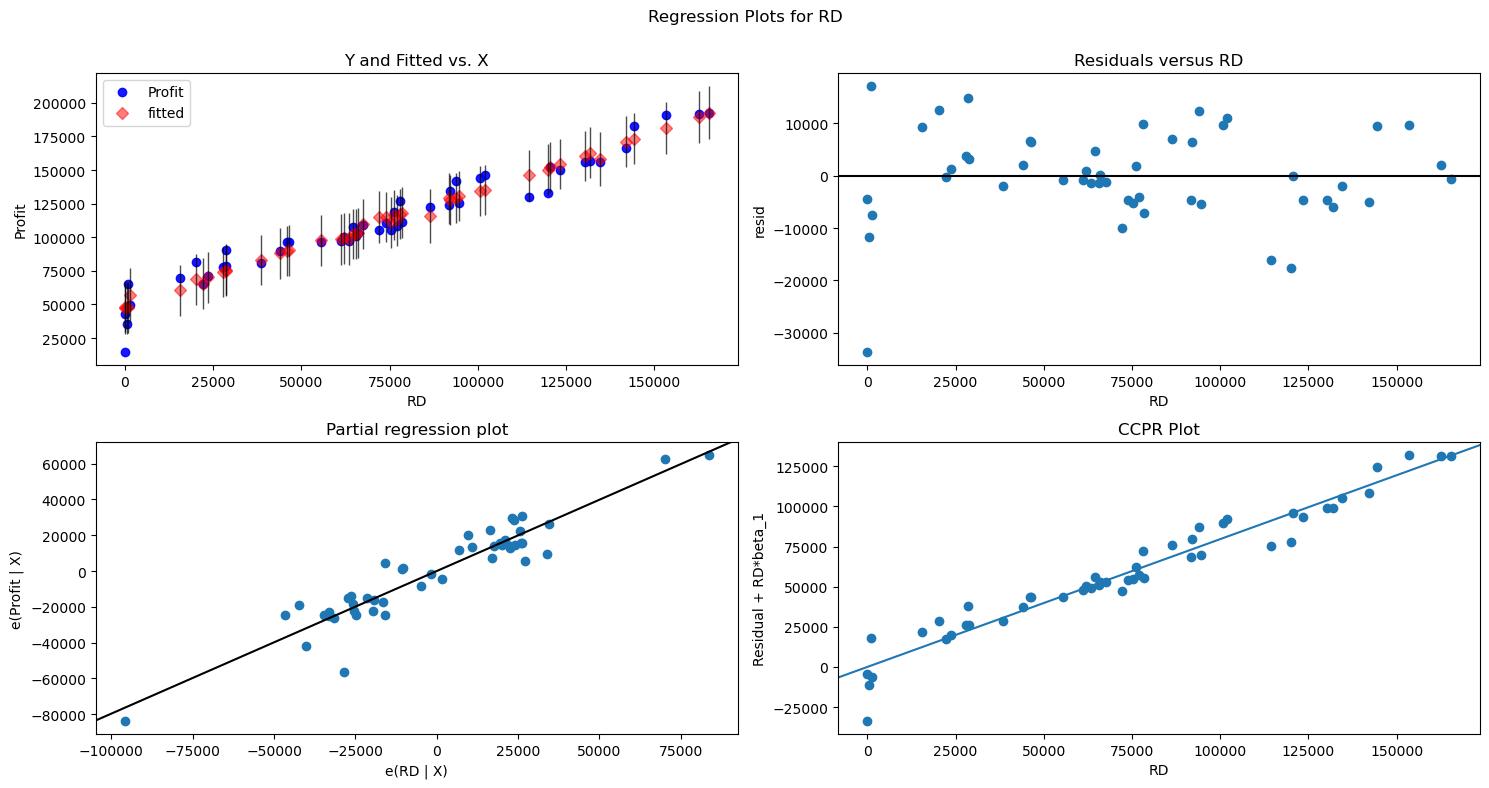

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'RD', fig=fig)
plt.show()

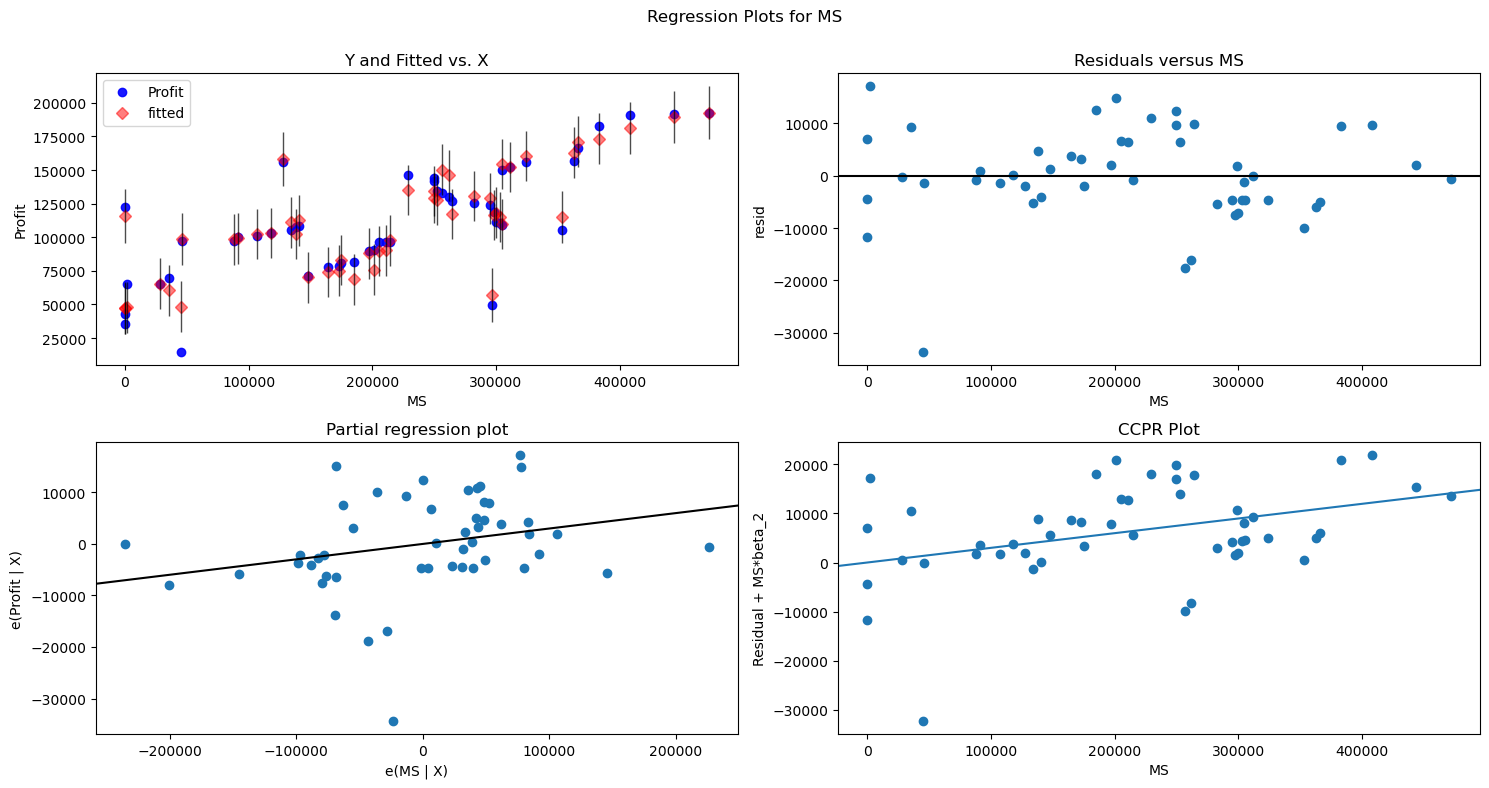

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, 'MS', fig=fig)
plt.show()

In [ ]:
model1_influence = model1.get_influence()
(c, _) = model1_influence.cooks_distance

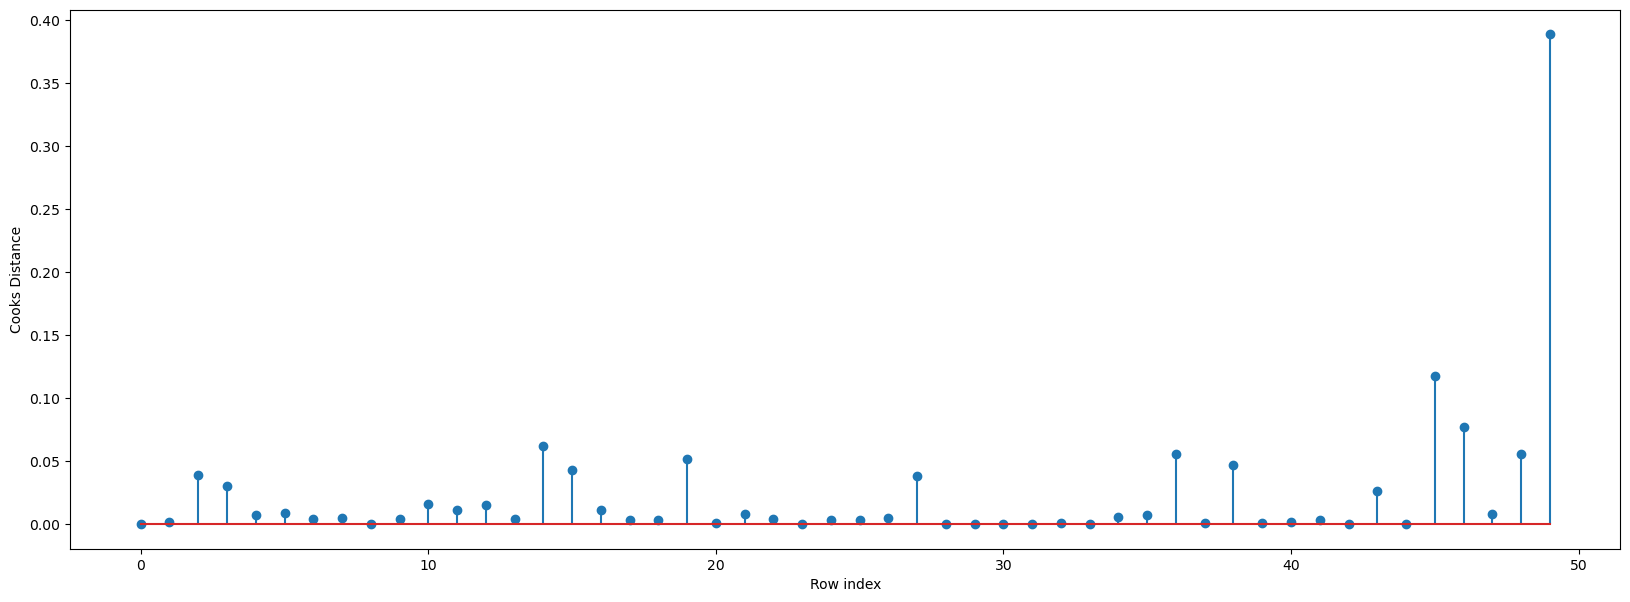

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c), np.max(c))

(49, 0.38948862279249175)

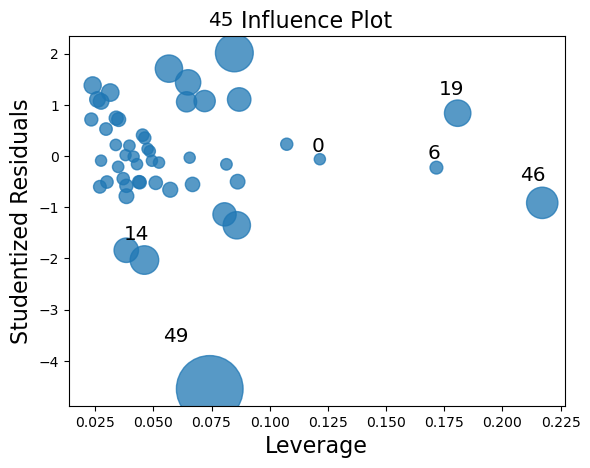

In [ ]:
influence_plot(model1)
plt.show()

In [ ]:
k = 2
n = df1.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.18

In [ ]:
df1[df1.index.isin([49])]

,RD,Admin,MS,Profit,Cali,Flori
49,0.0,116983.8,45173.06,14681.4,True,False


In [ ]:
df2 = df1.drop(['Admin', 'Cali', 'Flori'], axis=1)
df2

,RD,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
df3 = df2.drop(df2.index[[49]], axis=0).reset_index()
df3 = df3.drop(['index'], axis = 1)

In [ ]:
df3

,RD,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
model2 = smf.ols('Profit ~ RD+MS', data = df3).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Thu, 02 May 2024   Prob (F-statistic):           3.74e-33
Time:                        13:03:58   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RD             0.7754      0.035     22.136      0.000       0.705       0.846
MS             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model2_influence = model2.get_influence()
(c1, _) = model2_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

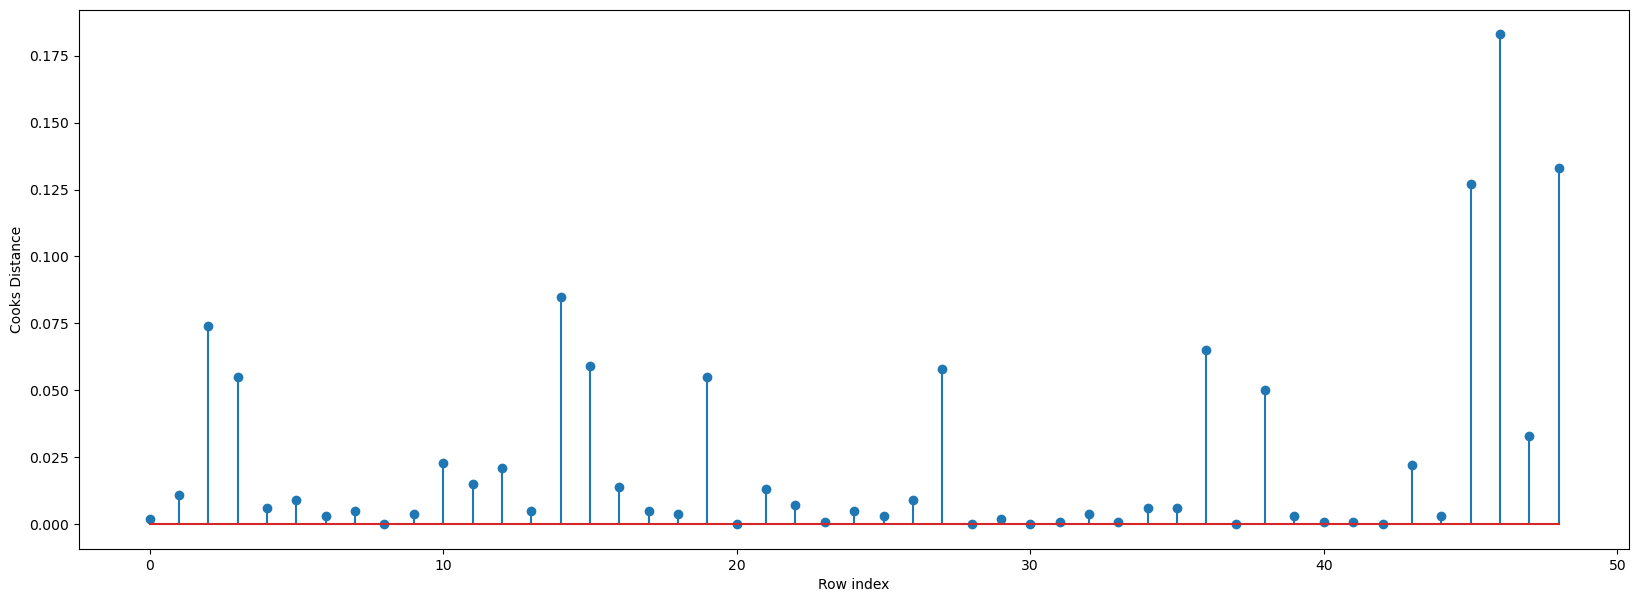

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c1,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c1), np.max(c1))

(46, 0.1833755649133854)

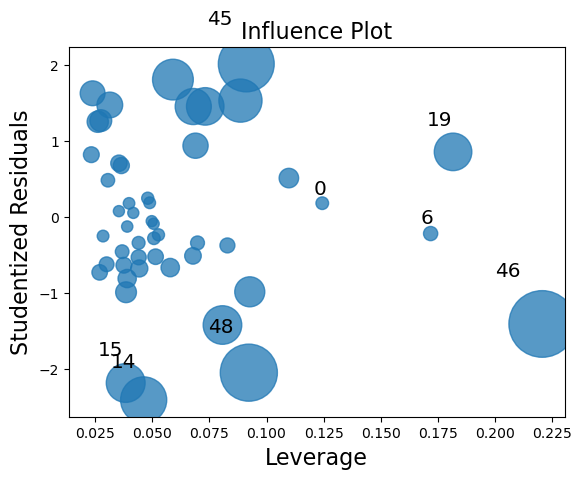

In [ ]:
influence_plot(model2)
plt.show()

In [ ]:
df3[df3.index.isin([46])]

,RD,MS,Profit
46,1315.46,297114.46,49490.75


In [ ]:
df4 = df3.drop(([46]), axis=0).reset_index()

In [ ]:
df4 = df4.drop(['index'], axis=1)

In [ ]:
df4

,RD,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
model3 = smf.ols('Profit ~ RD+MS', data = df4).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Thu, 02 May 2024   Prob (F-statistic):           2.94e-32
Time:                        13:03:59   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
RD             0.7512      0.039     19.431      0.000       0.673       0.829
MS             0.0353      0.014      2.511      0.016       0.007       0.064
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model3_influence = model3.get_influence()
(c2, _) = model3_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

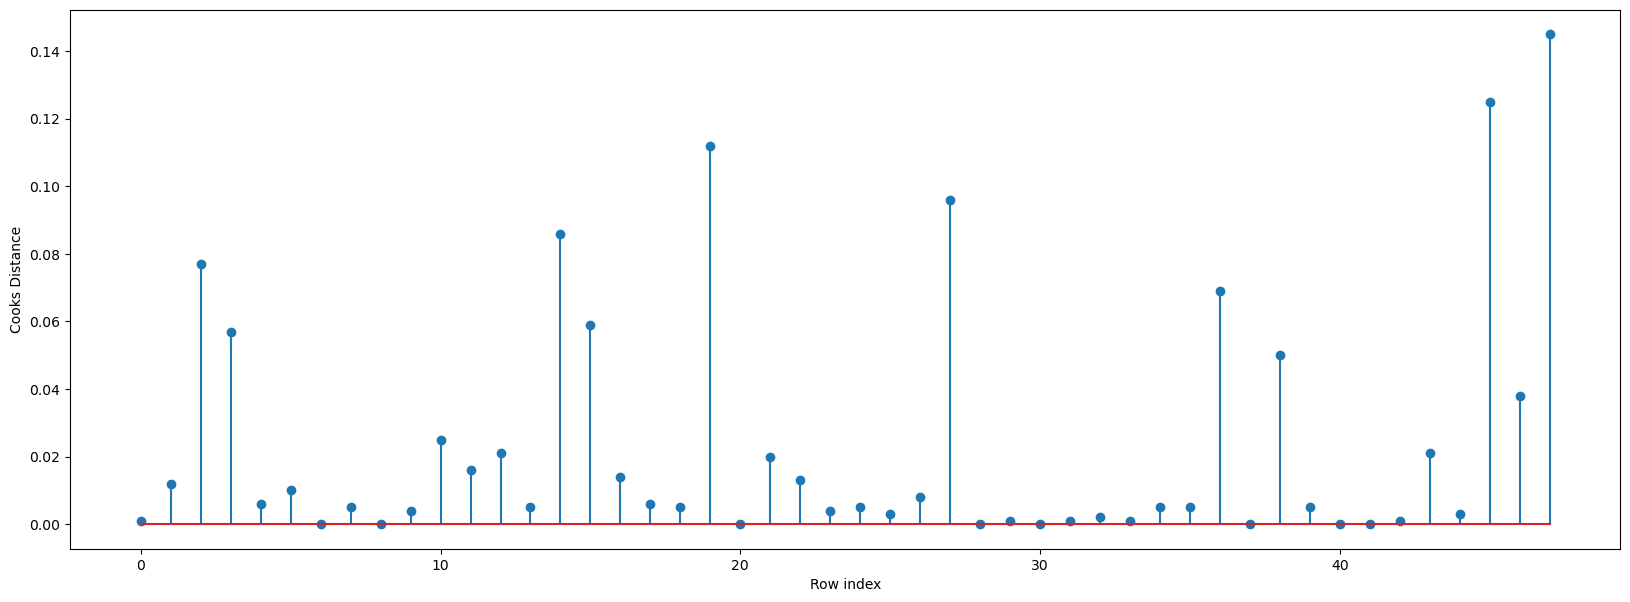

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c2,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c2), np.max(c2))

(47, 0.1454440343242377)

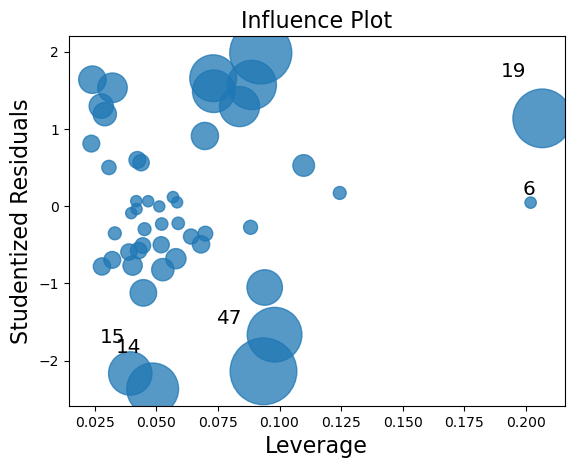

In [ ]:
influence_plot(model3)
plt.show()

In [ ]:
df4[df4.index.isin([47])]

,RD,MS,Profit
47,542.05,0.0,35673.41


In [ ]:
df5 = df4.drop(([47]), axis=0).reset_index()

In [ ]:
df5 = df5.drop(['index'], axis=1)

In [ ]:
df5

,RD,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
model4 = smf.ols('Profit ~ RD+MS', data=df5).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Thu, 02 May 2024   Prob (F-statistic):           1.65e-31
Time:                        13:03:59   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
RD             0.7439      0.037     19.902      0.000       0.669       0.819
MS             0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model4_influence = model4.get_influence()
(c3, _) = model4_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

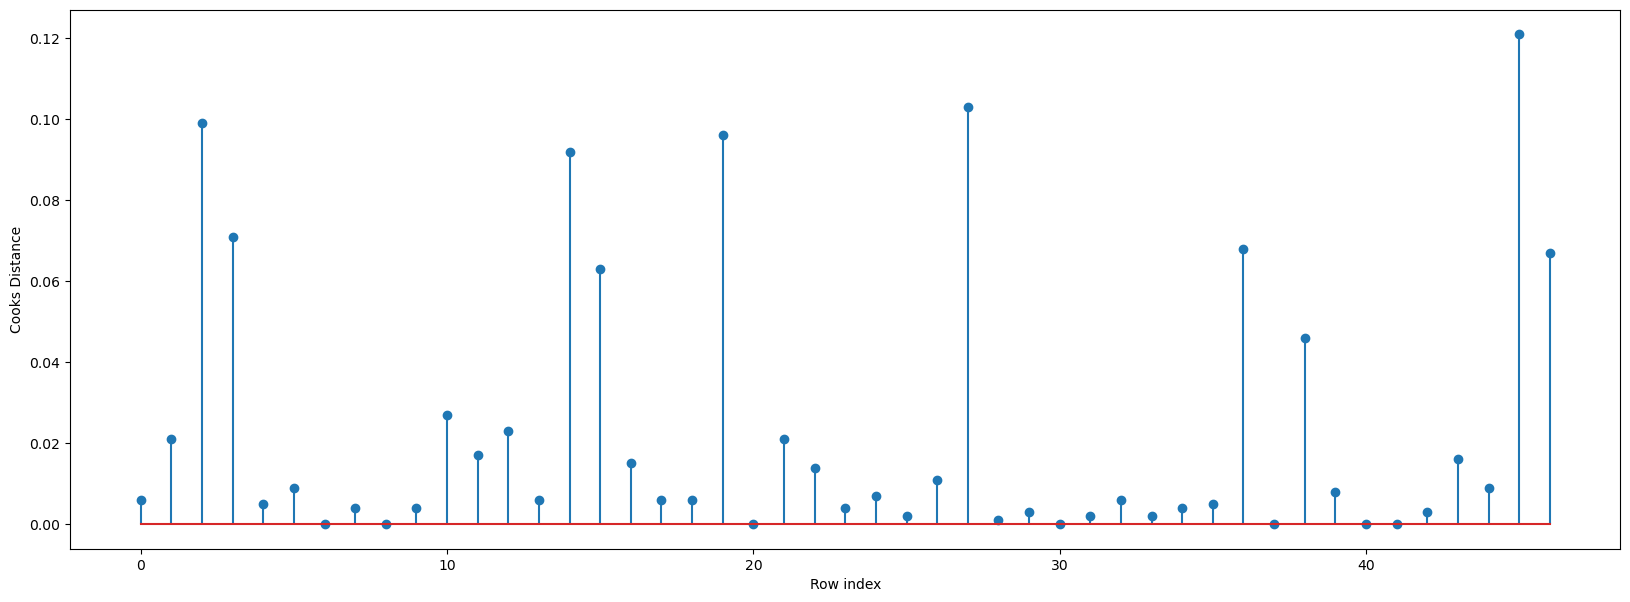

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c3,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c3),np.max(c3))

(45, 0.12080904032648007)

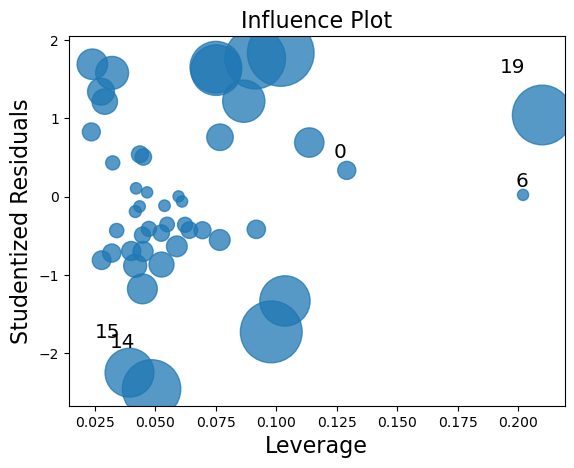

In [ ]:
influence_plot(model4)
plt.show()

In [ ]:
df6 = df5.drop([45], axis=0).reset_index()

In [ ]:
df6 = df6.drop(['index'], axis=1)

In [ ]:
df6

,RD,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
model5 = smf.ols('Profit ~ RD+MS', data = df6).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     532.5
Date:                Thu, 02 May 2024   Prob (F-statistic):           4.59e-31
Time:                        13:03:59   Log-Likelihood:                -471.88
No. Observations:                  46   AIC:                             949.8
Df Residuals:                      43   BIC:                             955.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.029e+04   2424.629     20.743      0.000    4.54e+04    5.52e+04
RD             0.7507      0.037     20.511      0.000       0.677       0.825
MS             0.0350      0.013      2.627      0.012       0.008       0.062
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.161
Skew:                          -0.079   Prob(JB):                        0.923
Kurtosis:                       2.758   Cond. No.                     6.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model5_influence = model5.get_influence()
(c4, _)= model5_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

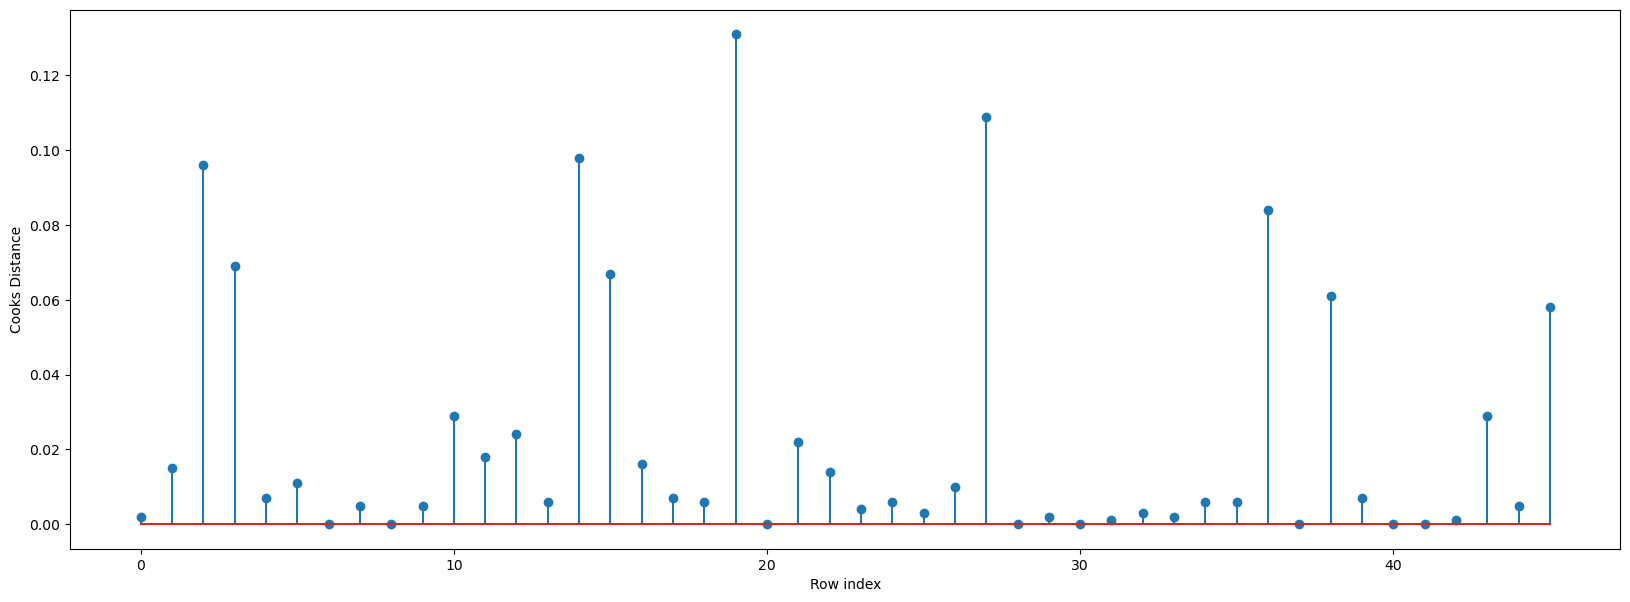

In [ ]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.round(c4,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c4), np.max(c4))

(19, 0.13115264468346086)

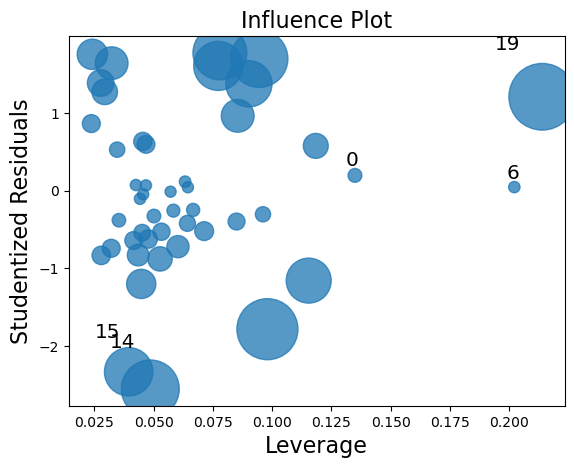

In [ ]:
influence_plot(model5)
plt.show()

In [ ]:
df7 = df6.drop([19,27], axis=0).reset_index()

In [ ]:
df7 = df7.drop(['index'], axis=1)

In [ ]:
df7

,RD,MS,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94
5,131876.90,362861.36,156991.12
6,134615.46,127716.82,156122.51
7,130298.13,323876.68,155752.60
8,120542.52,311613.29,152211.77
9,123334.88,304981.62,149759.96


In [ ]:
model6 = smf.ols('Profit ~ RD+MS', data = df7).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     575.6
Date:                Thu, 02 May 2024   Prob (F-statistic):           9.92e-31
Time:                        13:08:16   Log-Likelihood:                -449.60
No. Observations:                  44   AIC:                             905.2
Df Residuals:                      41   BIC:                             910.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.95e+04   2390.810     20.703      0.000    4.47e+04    5.43e+04
RD             0.7151      0.039     18.401      0.000       0.637       0.794
MS             0.0517      0.015      3.452      0.001       0.021       0.082
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.535
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.118
Skew:                          -0.061   Prob(JB):                        0.943
Kurtosis:                       2.777   Cond. No.                     6.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
model6_influence = model6.get_influence()
(c5, _) = model6_influence.cooks_distance

Text(0, 0.5, 'Cooks Distance')

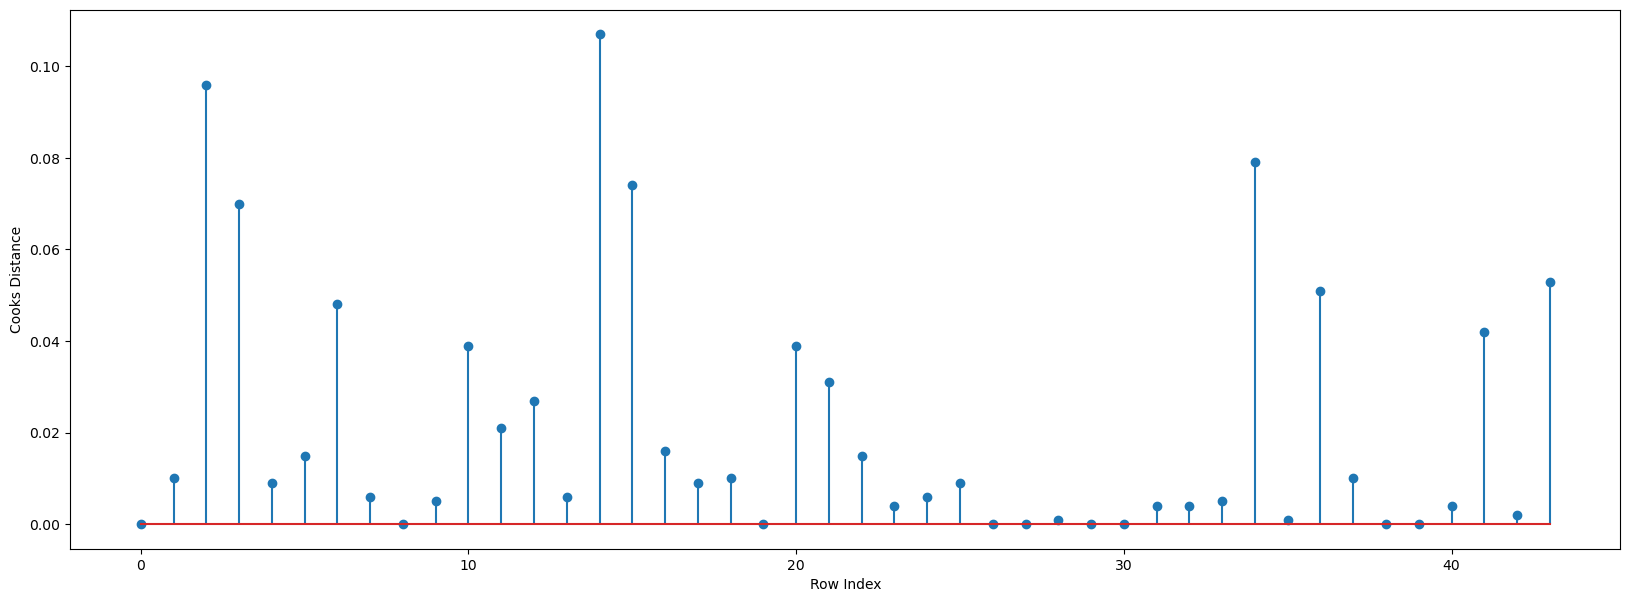

In [ ]:
fig = plt.subplots(figsize=(20,7))
fig = plt.stem(np.round(c5,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [ ]:
(np.argmax(c5),np.max(c5))

(14, 0.10730803791817747)

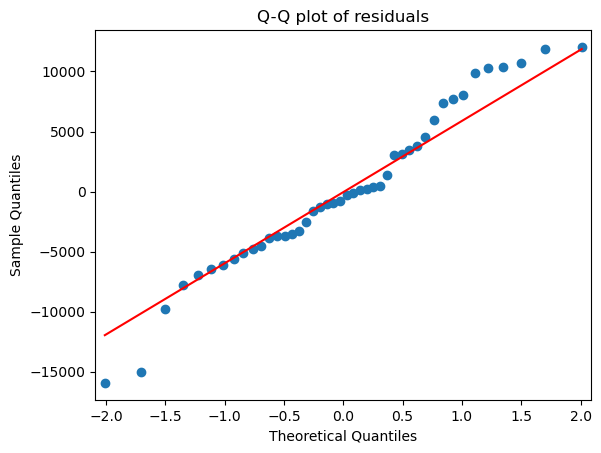

In [ ]:
sm.qqplot(model6.resid, line='q')
plt.title('Q-Q plot of residuals')
plt.show()

In [ ]:
Predicted = model6.fittedvalues

In [ ]:
Errors = model6.resid

In [ ]:
df['Predicted'] = predicted
df6['Errors'] = errors
df6

KeyError: 'predicted'